## Sales Dashboard

Below is just some code, this dashboard displays
- the revenue
- for the two customer "status" types "standard" and "premium"
- per day

In [22]:
import pandas as pd
import os

def get_todays_date():
    """ NO NEED TO UNDERSTAND THIS FUNCTION, IT'S JUST A UTILITY FOR LATER...
    The "day" is saved to a file, this function returns the day 
    e.g. "day-1", "day-2",..."""
    dag_path = os.getcwd()
    date_file = open("raw_data/current_day.txt", "r")
    return date_file.readline().strip()

In [32]:
today = get_todays_date()
today = "day-2"
print("Today is: ", today)

Today is:  day-2


In [36]:
# Read sales data
sales = pd.read_csv(f"processed_data/{today}/agg_sales.csv", header=0)

In [37]:
# Filter for each status
premium_sales = sales[sales['status'].str.contains("premium")][["revenue","sales_date"]]
std_sales = sales[sales['status'].str.contains("standard")][["revenue","sales_date"]]

## Main Dashboard

<Axes: xlabel='sales_date'>

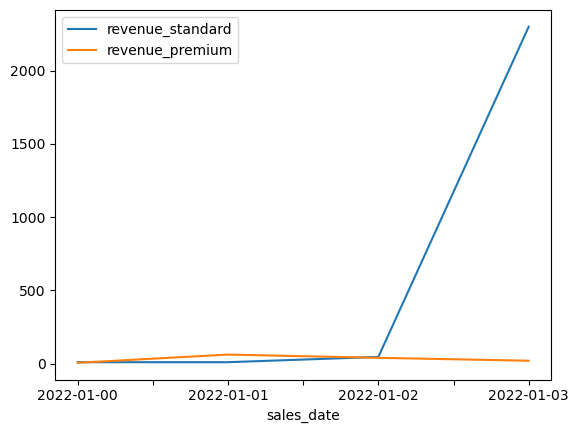

In [38]:
# Plot using pandas wrapper
plot_df=std_sales.merge(premium_sales, on="sales_date", how="left", suffixes=('_standard','_premium'))
plot_df.plot.line(x="sales_date")

<Axes: xlabel='sales_date'>

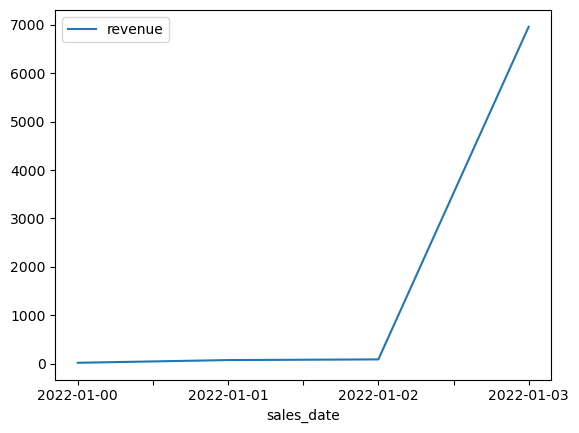

In [31]:
# Read order data
sales = pd.read_csv(f"processed_data/{today}/orders.csv", header=0)
sales_ts = sales.groupby("sales_date", group_keys=True).sum().reset_index()
sales_ts.plot.line(y="revenue", x="sales_date")

## Compare this to the data from yesterday ##

<Axes: xlabel='sales_date'>

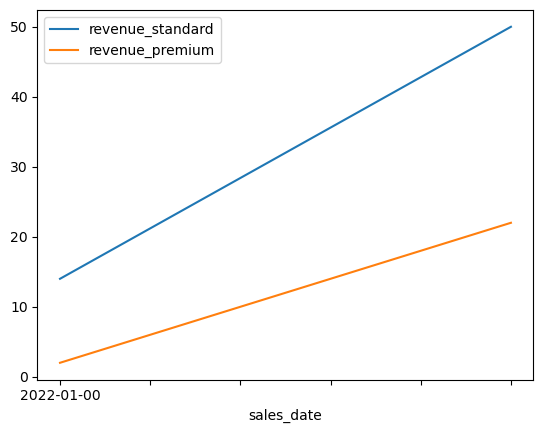

In [7]:
yesterday="day-1"

sales = pd.read_csv(f"processed_data/{yesterday}/agg_sales.csv", header=0)

# Filter for each status
premium_sales = sales[sales['status'].str.contains("premium")][["revenue","sales_date"]]
std_sales = sales[sales['status'].str.contains("standard")][["revenue","sales_date"]]

# Plot using pandas wrapper
plot_df=std_sales.merge(premium_sales, on="sales_date", how="left", suffixes=('_standard','_premium'))
plot_df.plot.line(x="sales_date")

## Investigate ##

In [8]:
users_yesterday = pd.read_csv(f"imported_data/{yesterday}/users.csv", header=0)

users_yesterday

,user_id,name,status
0,1,sven,standard
1,2,john,standard
2,3,doe,premium
3,4,not known,standard


In [9]:
users_today = pd.read_csv(f"imported_data/{today}/users.csv", header=0)

users_today

,user_id,name,status
0,1,sven,standard
1,2,john,premium
2,3,doe,premium
3,4,not known,standard
